# K Means Clustering

## Kumar Rahul

We will use car data to perform k means clustering using sklearn packages. Overview of different clustering algorithms as supported by `sklearn` can be found at: http://scikit-learn.org/stable/modules/clustering.html

In [1]:
import numpy as np
import pandas as pd

import matplotlib.cm as cm
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline


## Preparing Data

Read data from a specified location


In [2]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [2]:
raw_df = pd.read_csv( "C:/Users/Administrator/Desktop/Data_Science_with_Python_and_R_ashish/Code files/Dataset/Kmeans_Car data.csv", 
                        sep = ',', na_values = ['', ' '])

raw_df.columns = raw_df.columns.str.lower().str.replace(' ', '_')
raw_df.head()

,brand,car_models,price_(inr),mileage,seating_capacity,vehicle_type,fuel_type,transmission,parking_sensor,airbag,cruise_control,keyless_entry,alloy_wheels,abs,climate_control,rear_ac_vent,power_steering
0,Tata,Tata Nano Std BSIII,141898,25.4,4,Hatchback,Petrol,Manual,No,No,No,No,No,No,No,No,No
1,Tata,Tata Nano Std,145000,25.4,4,Hatchback,Petrol,Manual,No,No,No,No,No,No,No,No,No
2,Tata,Tata Nano 2013 STD,150000,25.4,4,Hatchback,Petrol,Manual,No,No,No,No,No,No,No,No,No
3,Tata,Tata Nano Cx BSIII,171489,25.4,4,Hatchback,Petrol,Manual,No,No,No,No,No,No,No,No,No
4,Tata,Tata Nano Cx,191125,25.4,4,Hatchback,Petrol,Manual,No,No,No,No,No,No,No,No,No



## 2. Extract Features and Standardize

Two ways to extract the features:

> * use `pd.filter` and pass the list of features to extract for scaling
* Use `pd.drop` and pass the list of features which need not be extracted

The feature can also be extracted by using `dataframeName[[<name of features>]]` 


In [3]:
#feature_df = raw_df[['price_(inr)','mileage', 'seating_capacity']]

feature_df = raw_df.filter({'price_(inr)','mileage', 'seating_capacity'}, axis =1)
col_names = feature_df.columns
#col_names

row_index = raw_df.iloc[:,2]
#row_index

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(feature_df))

#X.columns = col_names
#X.index = row_index 


## 3. k means clustering and quality metrics

The Euclidian distance between any two observations within the cluster will be lesser than the observations between clusters. This is used to derive ideal number of clusters and quality of clusters.

Some of the metrics using this information is Calinski and Harabasz Index (CH Index).

$ CH(k) = [(B(k)/(k-1))/(W(k)/(n-k))]$

Where CH(k) is the Calinski and Harabasz index with k-clusters (k > 1), B(k) and W(k) are the between and within clusters sum of squared variations with k clusters.The optimal K value is the one with maximum CH Index.

The other statistics which can be used is Silhouette width. Let a(i) be the average distance between an observation i and other points in the cluster to which observation i belongs.  Let b(i) be the minimum average distance between observation i and observations in other clusters.  Then the Silhouette statistic is defined by:

$ S(i) = [(b(i)-a(i))/Max(a(i),b(i))]$

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.



Overview of different clustering algorithms as supported by `sklearn` can be found at: http://scikit-learn.org/stable/modules/clustering.html


For n_clusters = 6 The average silhouette_score is : 0.48143042535193564


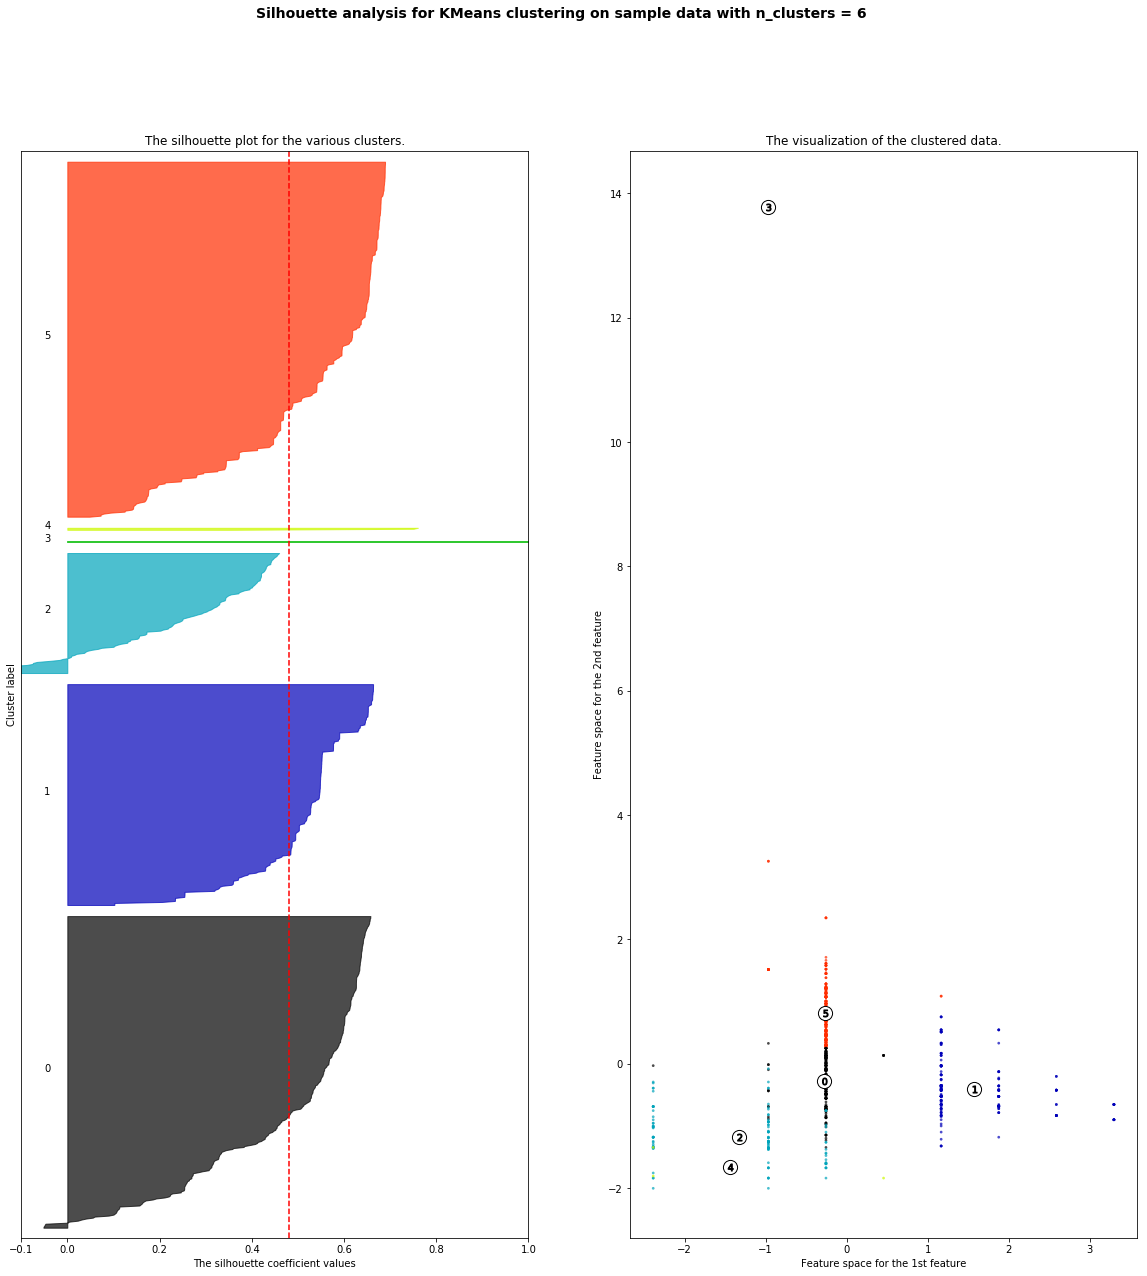

For n_clusters = 7 The average silhouette_score is : 0.48625642544769493


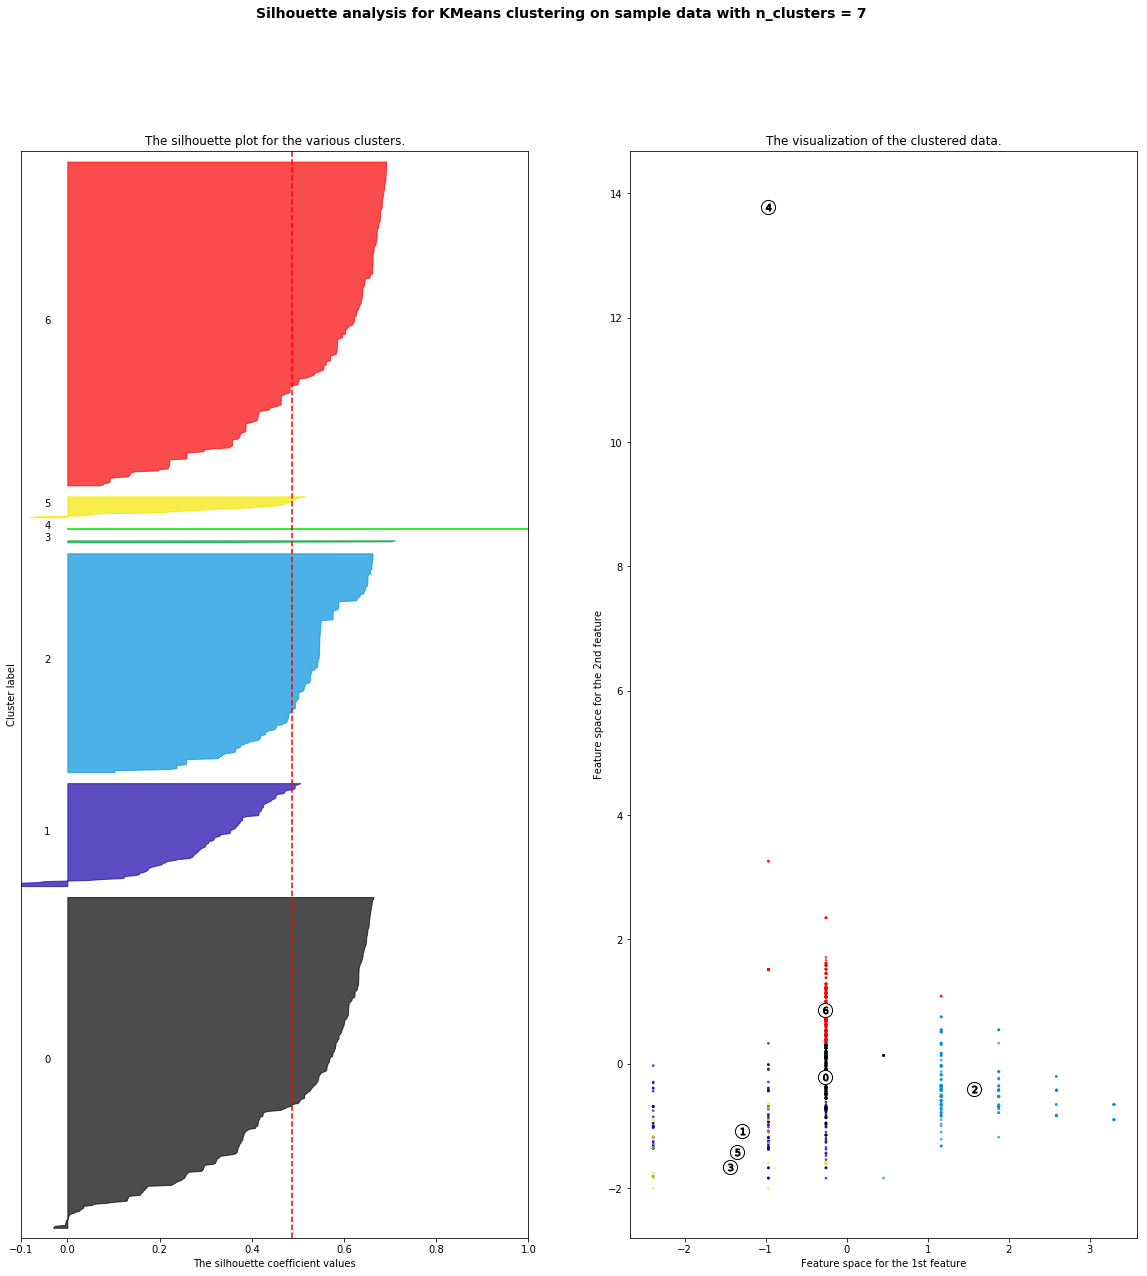

For n_clusters = 8 The average silhouette_score is : 0.4981203200635056


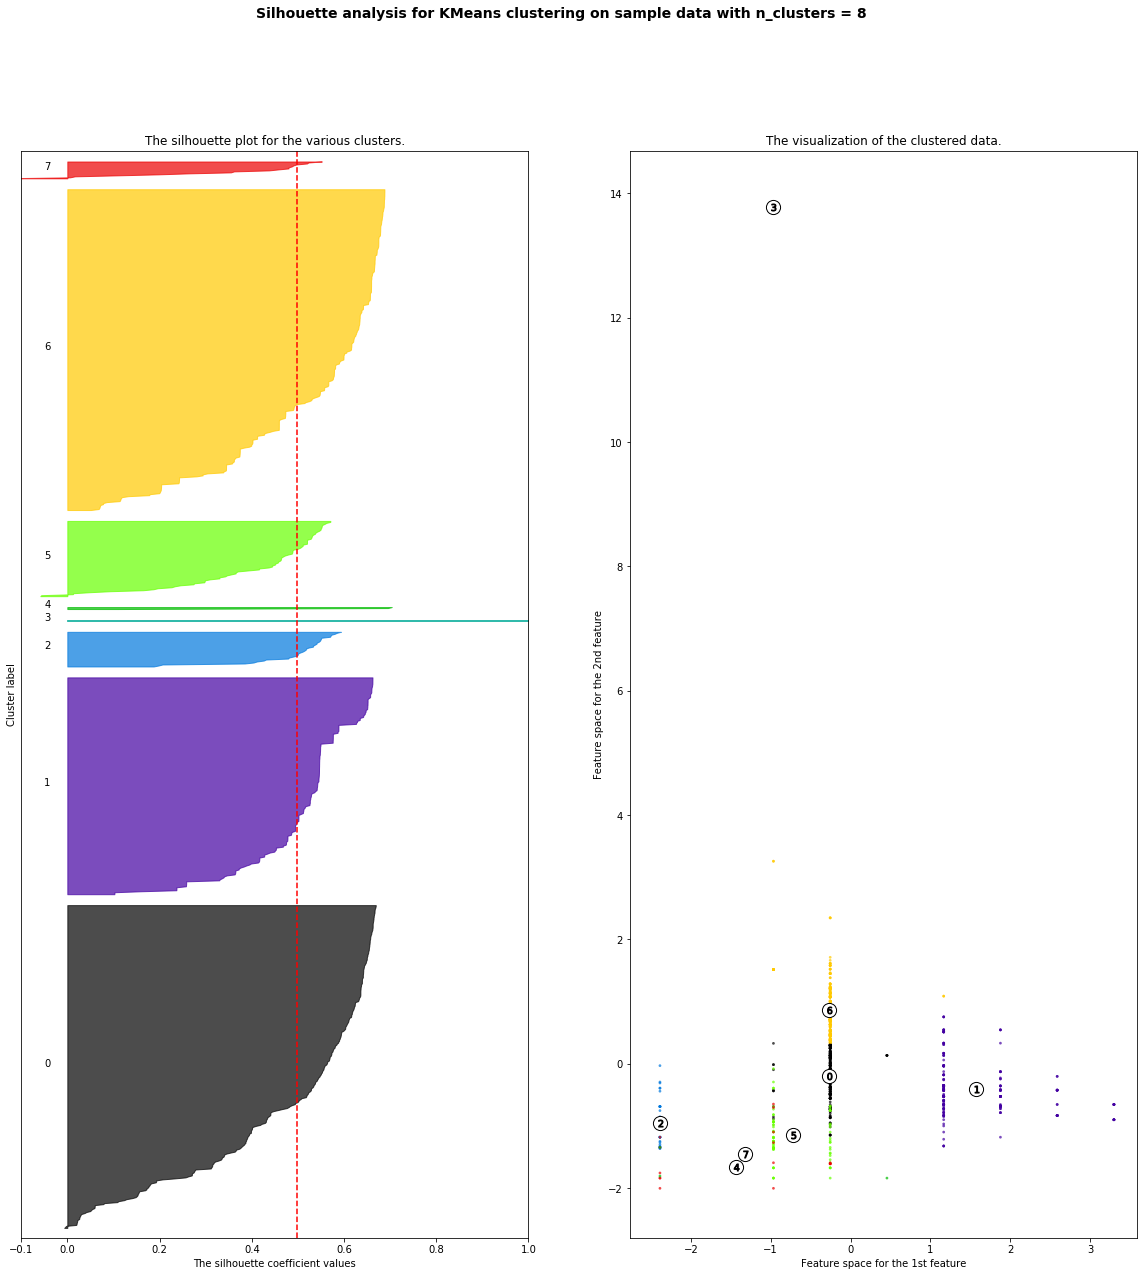

For n_clusters = 9 The average silhouette_score is : 0.4918852532839098


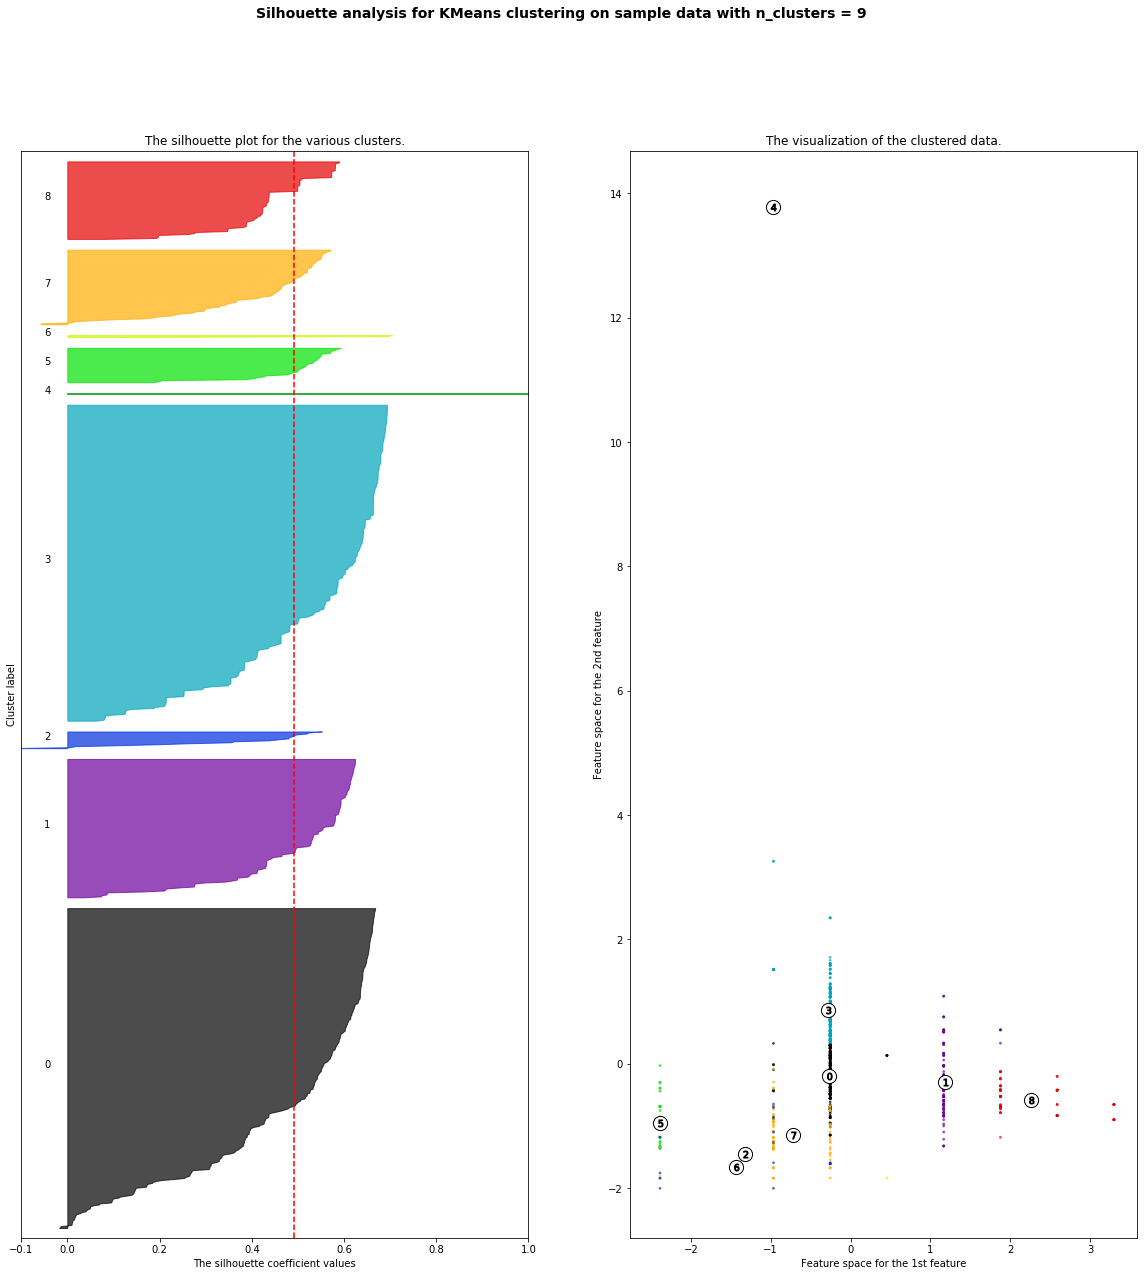

For n_clusters = 10 The average silhouette_score is : 0.4688368602939965


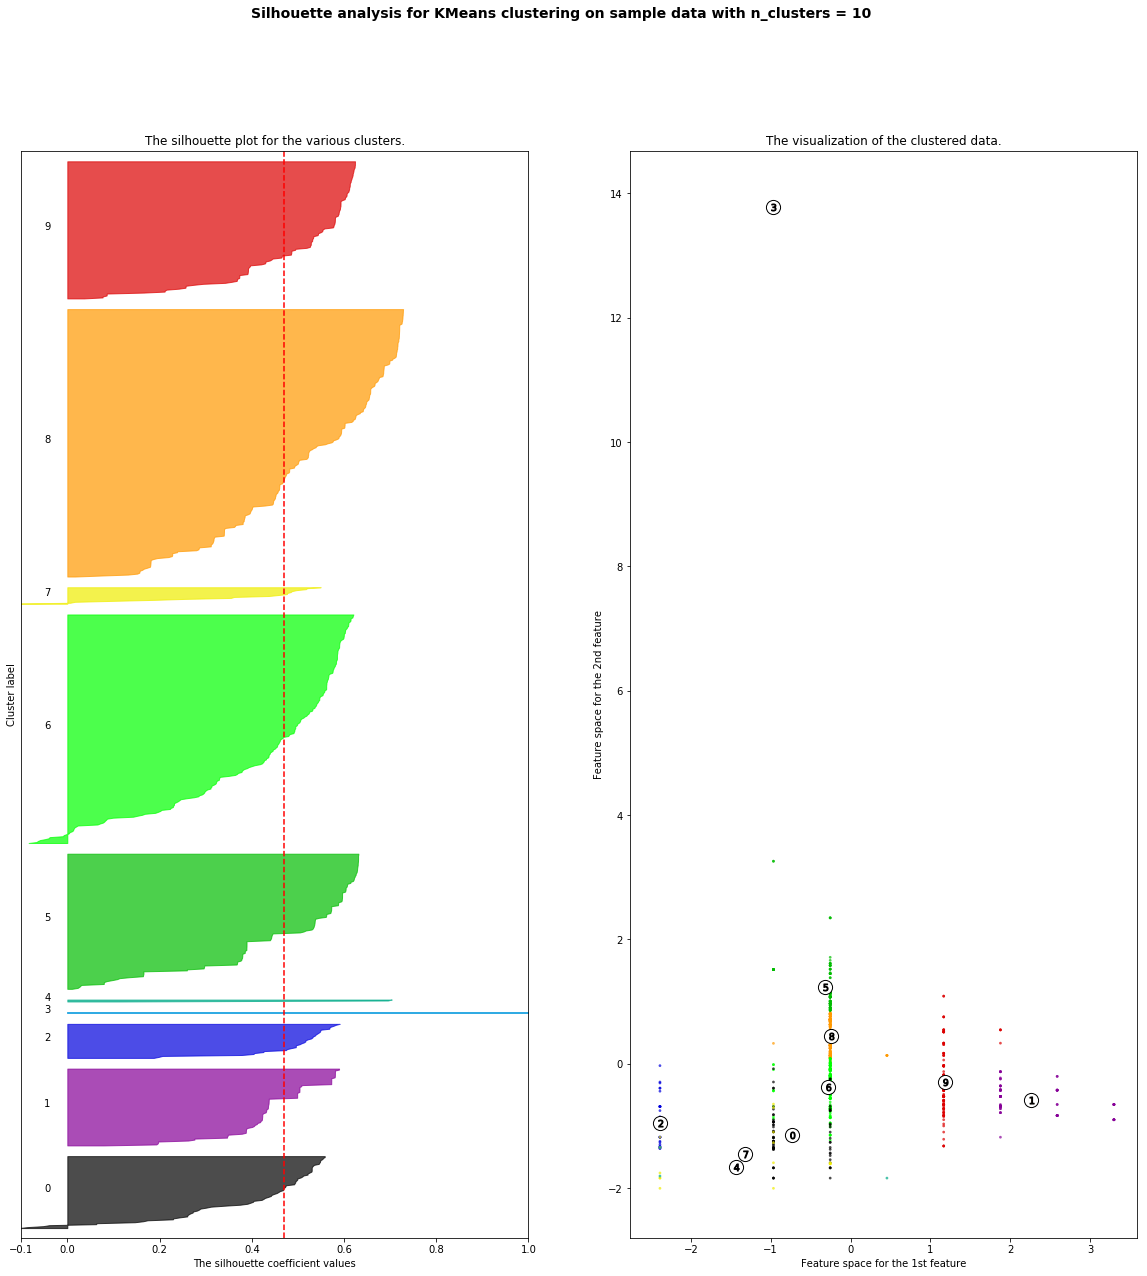

For n_clusters = 11 The average silhouette_score is : 0.46338065779023546


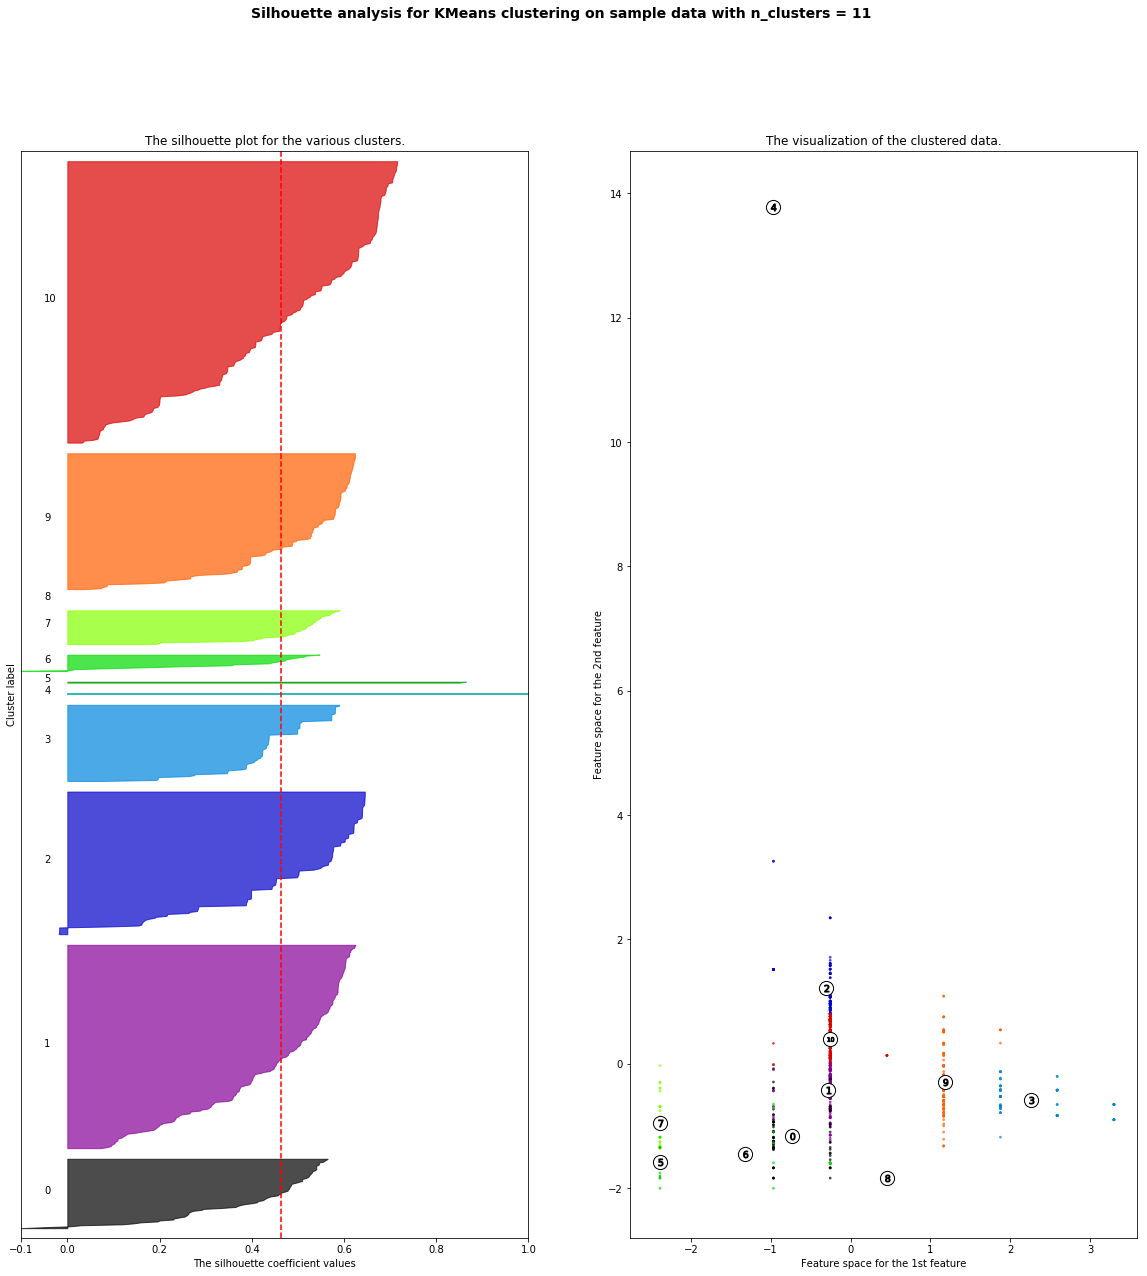

In [5]:
range_n_clusters = [6,7,8,9,10,11]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(20, 20)

    # The 1st subplot is the silhouette plot.The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples. This gives a perspective into 
    #the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

The silhouette plot shows that the none of the clusters are a good pick for the given data due to the presence of clusters with below average silhouette scores and also due to wide fluctuations in the size of the silhouette plots. 

Assume you have found a good cluster and want to find the observations which went into the cluster. Below code chunk will implement the same:

In [8]:
final_kmeans = KMeans(n_clusters=10, random_state=10)
final_kmeans.fit(X)
y_kmeans = final_kmeans.predict(X)

In [9]:
def ClusterIndicesComp(clustNum, labels_array): #list comprehension
    return np.array([i for i, x in enumerate(labels_array) if x == clustNum])

In [10]:
index = ClusterIndicesComp(2, final_kmeans.labels_)

index

array([389, 756, 792, 861, 862, 863, 872, 873, 887, 888, 889, 890, 891,
       892, 896, 897, 898, 899, 900, 922, 923, 946, 948, 950, 951, 957,
       958, 959, 960, 961, 969, 970, 971, 972, 983, 989])

In [11]:
car_name = []
for i in index:
    car_name.append(raw_df.iloc[i,1])

In [12]:
car_name

['San Motors Storm 1.2',
 'DC Avanti 2.0 L',
 'Caterham 7 Classic',
 'Audi TT 2.0 TFSI',
 'Nissan 370Z MT',
 'Nissan 370Z AT',
 'BMW Z4 35i',
 'BMW Z4 35i DPT',
 'Porsche Boxster 3.0',
 'Porsche Boxster S',
 'Porsche Cayman 3.0L',
 'Porsche Cayman S',
 'Mercedes Benz SLK Class SLK 350',
 'Mercedes Benz SLK Class 55 AMG',
 'Jaguar XK R S Coupe 5.0L Supercharged',
 'Jaguar XK R Coupe Special Edition',
 'Jaguar XK R 5.0L V8 Petrol Coupe',
 'Jaguar XK R 5.0L V8 Petrol Convertible',
 'Jaguar XK R Convertible Special Edition',
 'Mercedes Benz SL Class SL 350',
 'Mercedes Benz SL Class SL 500',
 'Porsche 911 Carrera Cabriolet',
 'Porsche 911 Carrera 4 Cabriolet',
 'Porsche 911 Carrera S Cabriolet',
 'Porsche 911 Carrera 4S Cabriolet',
 'Aston Martin Vantage V8 Sport',
 'Aston Martin Vantage V12 6.0L',
 'Aston Martin Vantage V8 4.7L',
 'Jaguar F Type 3.0 V6 S',
 'Jaguar F Type 5.0 V8 S',
 'Audi R8 4.2 FSI quattro',
 'Audi R8 5.2 FSI',
 'Audi R8 Spyder',
 'Audi R8 V10 Plus',
 'Ferrari Californi